# Drive Speed - Mini Project
A critical skill for any data analyst is the ability to figure out new things about machine learning, which is the goal for this lesson.  
The goal is to do terrain classification with an algorithm of your choice, researching and deploying it on your own.

In [1]:
import time
from math import ceil

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

## Load data

In [2]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

The training data (features_train, labels_train) have both "fast" and "slow" points mixed together.  
Separate them so we can give them different colors in the scatterplot and identify them visually.

In [3]:
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

## Data visualization

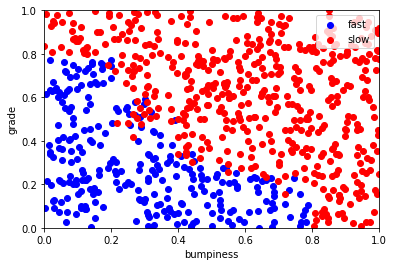

In [4]:
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend(loc='upper right')
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

## Build and train the classifiers

### Define functions to build and train the classifiers

In [5]:
def train_pipeline(name, clazz, params={}):
    # Create the classifier
    clf = clazz(**params)
    # Train
    t0 = time.time()
    train(clf)
    training_time = time.time()-t0
    # Get metrics
    acc = get_metrics(clf)
    # Store results
    results[name] = {
        'clf': clf,
        'acc': acc,
        'training_time': training_time}
    return results

def train(clf):
    clf.fit(features_train, labels_train)

def get_metrics(clf):
    y_pred = clf.predict(features_test)
    acc = accuracy_score(labels_test, y_pred)
    return acc

### Define the parameters of the classifiers

In [6]:
classifiers = [
    ('Logistic Regression', LogisticRegression),
    ('Gaussian Naïve Bayes', GaussianNB),
    ('Decision Tree', DecisionTreeClassifier, {'min_samples_leaf': 5}),
    ('Random Forest', RandomForestClassifier, {'min_samples_leaf': 10}),
    ('Ada Boost', AdaBoostClassifier),
    ('Gradient Boosting', GradientBoostingClassifier, {'learning_rate': 0.05}),
    ('K-Nearest Neighbors', KNeighborsClassifier, {'n_neighbors': 8, 'p': 1}),
    ('Support Vector Machine - Linear', SVC, {'kernel': 'linear'}),
    ('Support Vector Machine - RBF', SVC, {'kernel': 'rbf'}),
    ('SVM - RBF C=3, G=20', SVC, {'kernel': 'rbf', 'C': 3, 'gamma': 20})]

### Train the classifiers

In [7]:
results = {}
for params in classifiers:
    results.update(train_pipeline(*params))

## Plot the results

### Plot test data and decision boundaries

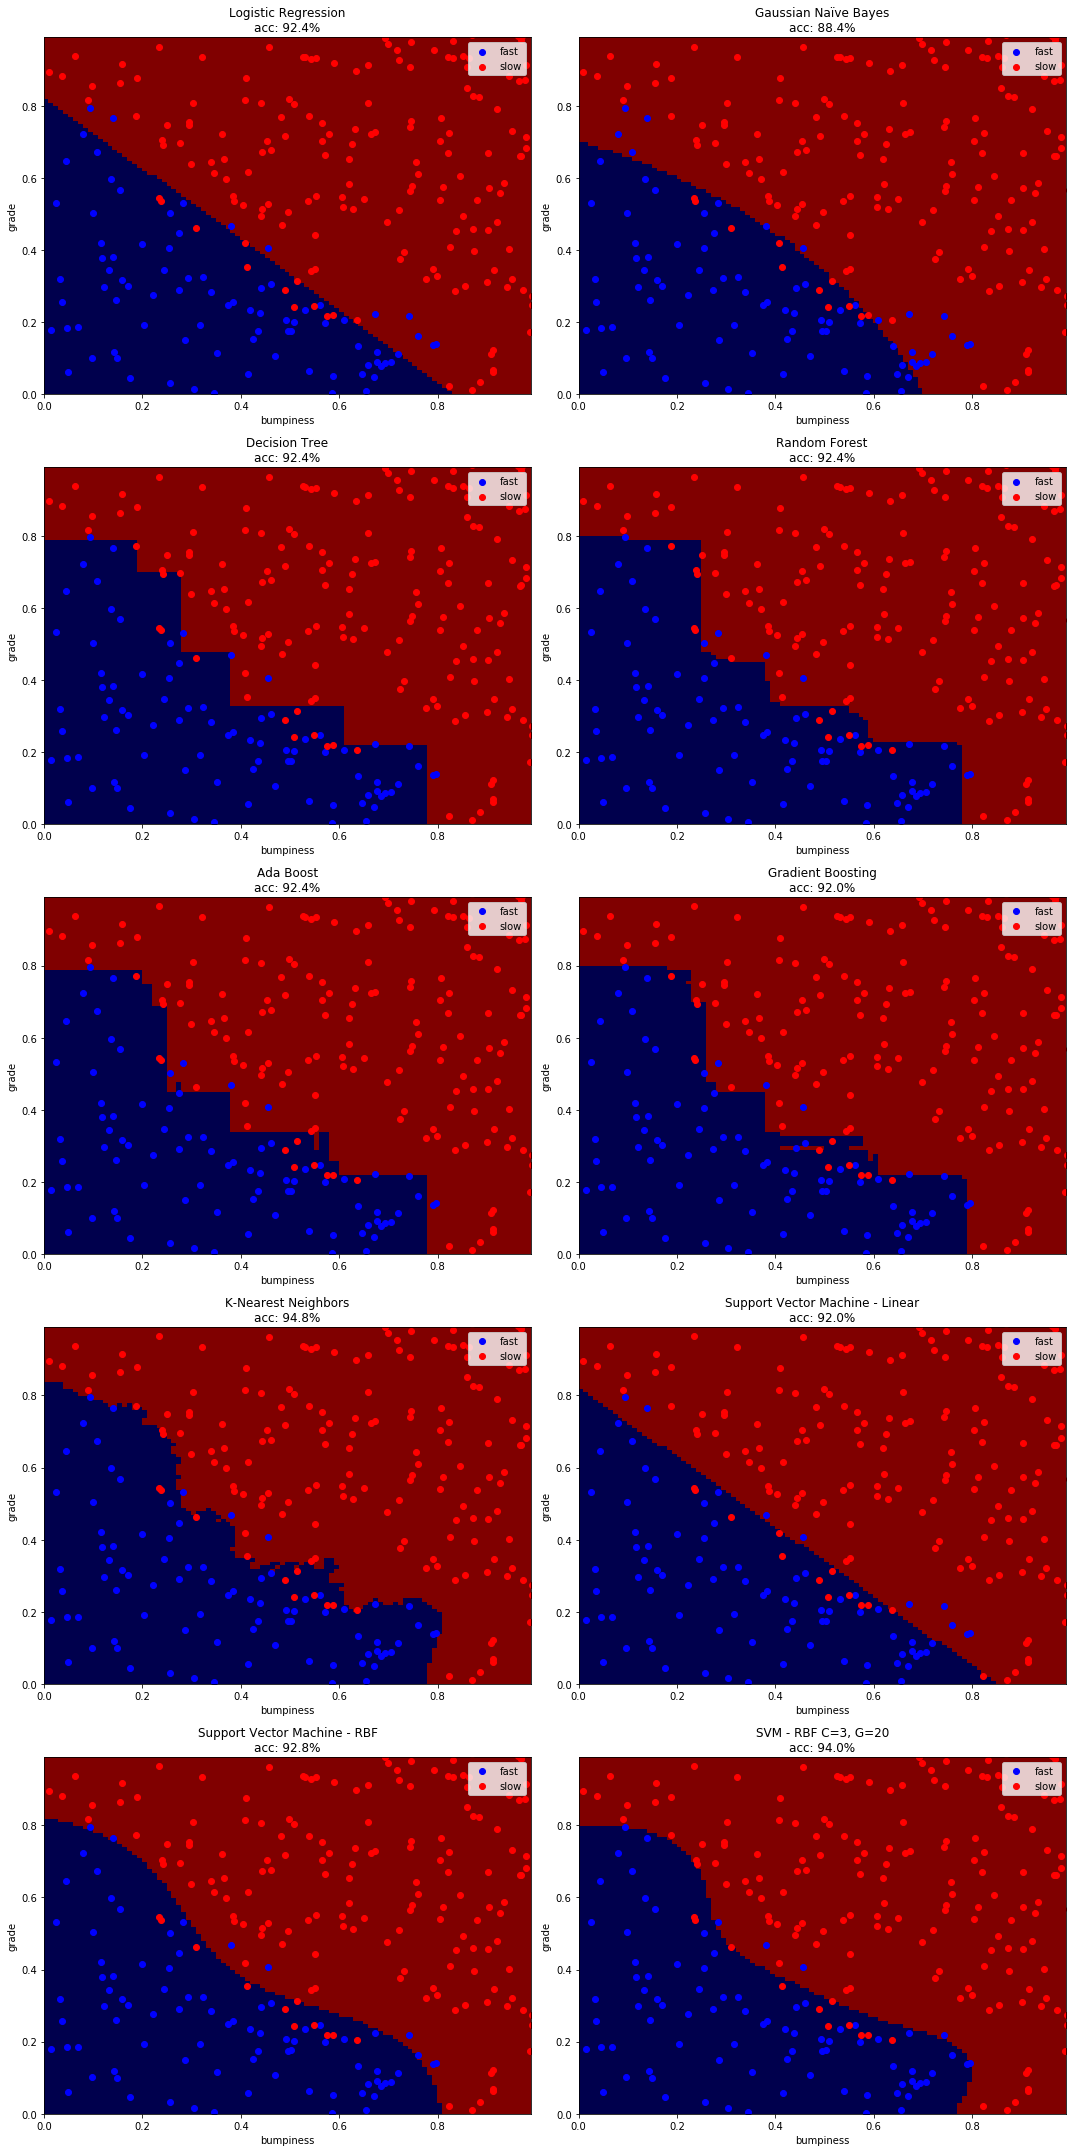

In [8]:
fig, ax = plt.subplots(figsize=(15, 3 * len(results)),
                       ncols=2,
                       nrows=ceil(len(results)/2))
ax = ax.flatten()
for i, (name, values) in enumerate(results.items()):
    ax[i].set_title(f'{name}\nacc: {round(values["acc"]*100, 4)}%')
    prettyPicture(values['clf'], features_test, labels_test, ax[i])

plt.tight_layout()
plt.show()

### Plot training time and accuracy for each classifier

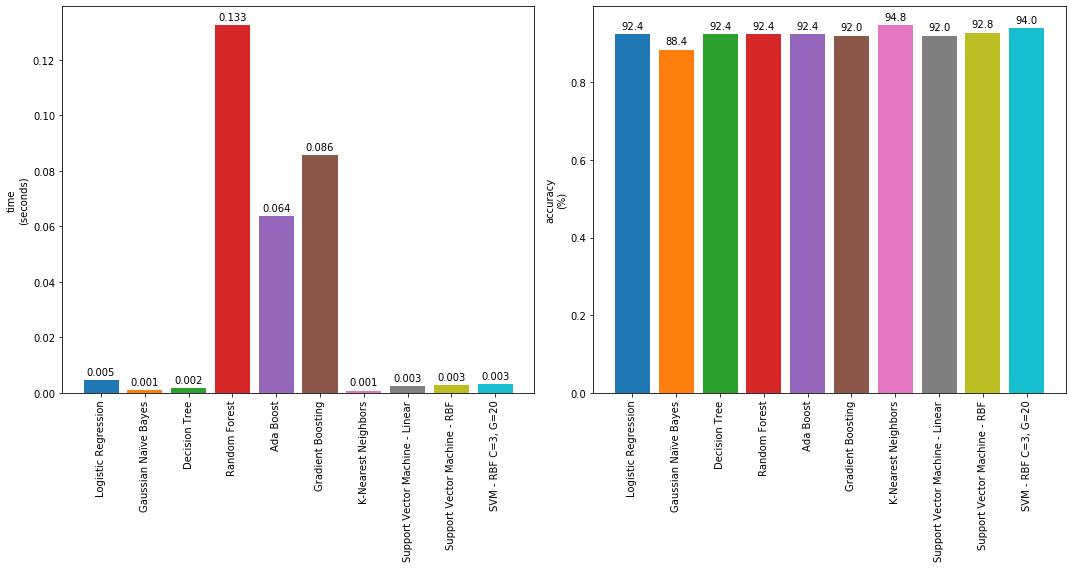

In [9]:
fig, ax = plt.subplots(figsize=(15,8), nrows=1, ncols=2)
ax[0].set_ylabel('time\n(seconds)')
ax[1].set_ylabel('accuracy\n(%)')

rects1 = []
rects2 = []
for name, result in results.items():
    rects1.append(ax[0].bar(name, result['training_time']))
    rects2.append(ax[1].bar(name, result['acc']))

for a in ax:
    plt.sca(a)
    plt.xticks(rotation=90)

def autolabel(rects, ax, func=lambda x: x):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        rect = rect[0]
        height = rect.get_height()
        ax.annotate('{}'.format(round(func(height),3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax[0])
autolabel(rects2, ax[1], func=lambda x: x*100)

fig.tight_layout()

plt.show()